In [1]:
import requests
import json
import pandas as pd
import datetime
!pip install quandl 
import quandl

## Bitcoin Price Analysis in USD: Rationale and Chosen Variables

### Why Choose Bitcoin Price in USD for Time Series Analysis?

- **Market Influence and Popularity:** As the first and most well-known cryptocurrency, Bitcoin significantly influences the crypto market and serves as a bellwether for broader cryptocurrency trends.
- **Volatility:** Notorious for its volatility, Bitcoin provides a dynamic subject for statistical analysis, offering insights into both rapid price changes and long-term trends.
- **Economic Insights:** Fluctuations in Bitcoin prices can reflect broader economic sentiments, impacts of policy changes, and shifts in investor behavior.
- **Data Availability:** High-frequency, high-quality trading data from various exchanges ensures a rich dataset for analysis.
- **Innovative Technology Trends:** Movements in Bitcoin prices often correlate with advancements in blockchain technology and market acceptance.
- **Regulatory Environment:** Changes in cryptocurrency regulations can have immediate and profound effects on prices, making it a crucial aspect of analysis.
- **Decentralization:** Bitcoin operates outside traditional financial systems, presenting a unique study of non-sovereign currency behavior.
- **Speculative Interest:** The asset attracts significant speculative interest, affecting its price and market dynamics.
- **Global Events:** Bitcoin's global sensitivity makes it a prime candidate for studying the impact of international economic and political developments.
- **Investment and Diversification:** Growing institutional interest and its role in investment diversification further highlight the importance of analyzing Bitcoin prices.

### Chosen Variables and Rationale for Bitcoin Price Prediction

1. **Moving Averages (MA_14 and MA_60)**
   - **Purpose:** Identify short-term and long-term trends in Bitcoin price movements.
   - **Obtainability:** Calculated from historical price data.

2. **Standard Deviations (STD_30 and STD_60)**
   - **Purpose:** Measure the volatility of Bitcoin prices over specific time frames.
   - **Obtainability:** Derived from historical price data.

3. **Momentum Indicators (Momentum_7 and Momentum_14)**
   - **Purpose:** Gauge the strength and speed of Bitcoin price movements.
   - **Obtainability:** Computed by comparing current prices with prices from 7 and 14 days ago.

4. **Exponential Moving Averages (EMA_14 and EMA_30)**
   - **Purpose:** Provide a weighted mean of prices to identify trends more responsive to recent changes.
   - **Obtainability:** Calculated using more recent price data to give higher importance.

5. **Weekday and Month Day**
   - **Purpose:** Capture any cyclical patterns related to specific days of the week or month.
   - **Obtainability:** Easily extracted from the date-time data of price entries.

### Hard-to-Obtain Variables and Challenges

- **Private Trading Volumes and Major Holders' Wallet Activities:** Lack of public data on large private transactions and the anonymous nature of blockchain wallets.
- **Real-Time Regulatory Developments and Global Macroeconomic Data:** Accessibility issues due to confidentiality and the complexity of real-time data aggregation.
- **Cryptocurrency Market Sentiment Data:** Requires advanced analytics on extensive social media and news datasets.
- **Underground or Illegal Market Data:** Ethical and legal restrictions prevent the use of this data.
- **In-depth Financial Health of Exchanges:** Proprietary financial information is not publicly disclosed.

### Strategies for Addressing Data Gaps

- Utilize proxy variables and available partial datasets.
- Employ sentiment analysis tools for public opinion gauging.
- Analyze detectable market anomalies as indirect indicators of hidden activities.

By systematically addressing these variables and data challenges, the analysis aims to provide a comprehensive understanding of the factors influencing Bitcoin prices, enhancing predictive accuracy and offering valuable insights into market dynamics.torical prices.






In [2]:
# importing fucntions to make sure api key is not displayed
!pip install python-dotenv
import os

In [3]:
def get_historical_close_price(BTC, USD, limit=2000, aggregate=1, api_key='API_KEY'):
    url = f"https://min-api.cryptocompare.com/data/v2/histoday"
    params = {
        'fsym': BTC,
        'tsym': USD,
        'limit': limit,
        'aggregate': aggregate,
        'api_key': api_key
    }
    response = requests.get(url, params=params)
    data = response.json()['Data']['Data']
    df = pd.DataFrame(data)[['time', 'close']]
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

btc = get_historical_close_price('BTC', 'USD', api_key='API_KEY')
print(btc)

               close
time                
2018-11-06   6479.72
2018-11-07   6529.68
2018-11-08   6446.06
2018-11-09   6377.99
2018-11-10   6396.37
...              ...
2024-04-24  64263.95
2024-04-25  64488.49
2024-04-26  63750.63
2024-04-27  63434.44
2024-04-28  63760.27

[2001 rows x 1 columns]


In [4]:
# Ensuring that there are not empty values 
print(btc.isnull().sum())

close    0
dtype: int64


In [5]:
# Importing required libraries for plotting
import matplotlib as plt
import matplotlib.pyplot as plt

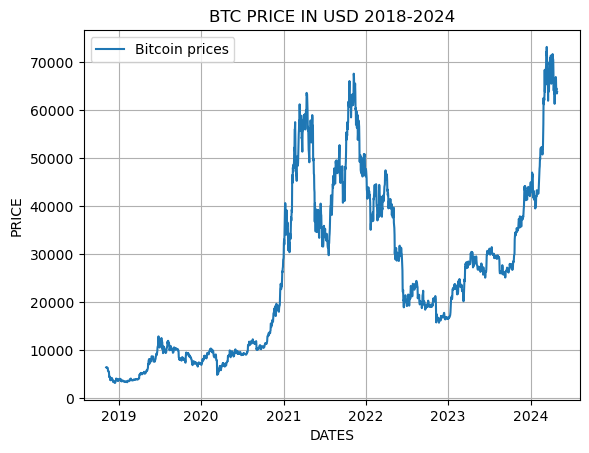

In [6]:
# Plotting the Data
plt.plot(btc.index, btc['close'], label='Bitcoin prices')  
plt.title('BTC PRICE IN USD 2018-2024')  
plt.xlabel('DATES')  
plt.ylabel('PRICE') 
plt.legend()  
plt.grid(True)  
plt.show()

In [8]:
Quarter_1 = btc['close'].quantile(0.25)
Quarter_3 = btc['close'].quantile(0.75)
IQR = Quarter_3 - Quarter_1

In [9]:
LB = Quarter_1 - 1.5 * IQR
UB = Quarter_3 + 1.5 * IQR

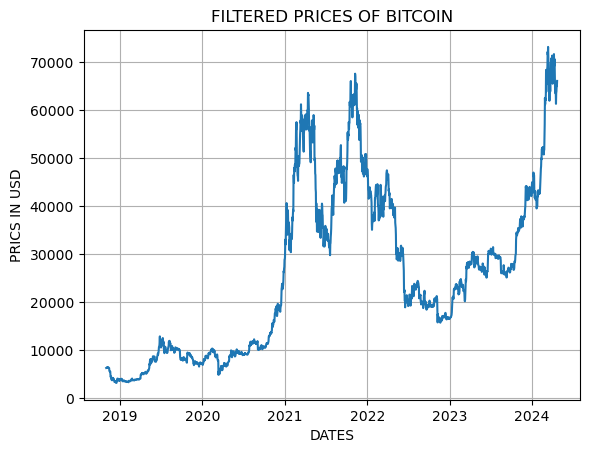

In [10]:
btc_cleaned = btc[(btc['close'] >= LB) & (btc['close'] <= UB)]

# plotting the cleansed data
plt.plot(btc_cleaned.index, btc_cleaned['close'], label='FILTERED DATA')
plt.title('FILTERED PRICES OF BITCOIN')
plt.xlabel('DATES')
plt.ylabel('PRICS IN USD')
plt.legend
plt.grid(True)
plt.show()

In [11]:
# Putting more features for a borader model
btc_cleaned['MA_14'] = btc_cleaned['close'].rolling(window=14).mean()
btc_cleaned['MA_60'] = btc_cleaned['close'].rolling(window=60).mean()
btc_cleaned['STD_30'] = btc_cleaned['close'].rolling(window=30).std()
btc_cleaned['STD_60'] = btc_cleaned['close'].rolling(window=60).std()

# Adding Momentum Indicators
btc_cleaned['Momentum_7'] = btc_cleaned['close'] - btc_cleaned['close'].shift(7)
btc_cleaned['Momentum_14'] = btc_cleaned['close'] - btc_cleaned['close'].shift(14)

# Adding Exponentiol Moving Averages
btc_cleaned['EMA_14'] = btc_cleaned['close'].ewm(span=14, adjust=False).mean()
btc_cleaned['EMA_30'] = btc_cleaned['close'].ewm(span=30, adjust=False).mean()

# Adding weekday prices to detect seasonality 
btc_cleaned['Weekday'] = btc_cleaned.index.weekday

# Detecting impact of Day of the Month on Investments
btc_cleaned['Month_Day'] = btc_cleaned.index.day

# Normalizing Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['MA_14', 'MA_60', 'STD_30', 'STD_60', 'Momentum_7', 'Momentum_14', 'EMA_14', 'EMA_30', 'Weekday', 'Month_Day']
btc_cleaned[features] = scaler.fit_transform(btc_cleaned[features].fillna(0))

In [12]:
import numpy as np
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [42]:
#
X = btc[features].dropna()  # Drop rows with NA values in features
y = btc['close'][X.index]  # Select y values that correspond to the index of X

# Verify that X and y have the same length
print(f"Number of samples in X: {X.shape[0]}")
print(f"Number of samples in y: {y.shape[0]}")

if X.shape[0] != y.shape[0]:
    raise ValueError("The number of samples in X and y must be equal.")

# Proceed with the data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Number of samples in X: 1942
Number of samples in y: 1942


In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Feature calculations
btc_cleaned['MA_14'] = btc_cleaned['close'].rolling(window=14).mean()
btc_cleaned['MA_60'] = btc_cleaned['close'].rolling(window=60).mean()
btc_cleaned['STD_30'] = btc_cleaned['close'].rolling(window=30).std()
btc_cleaned['STD_60'] = btc_cleaned['close'].rolling(window=60).std()

btc_cleaned['Momentum_7'] = btc_cleaned['close'] - btc_cleaned['close'].shift(7)
btc_cleaned['Momentum_14'] = btc_cleaned['close'] - btc_cleaned['close'].shift(14)

btc_cleaned['EMA_14'] = btc_cleaned['close'].ewm(span=14, adjust=False).mean()
btc_cleaned['EMA_30'] = btc_cleaned['close'].ewm(span=30, adjust=False).mean()

btc_cleaned['Weekday'] = btc_cleaned.index.weekday
btc_cleaned['Month_Day'] = btc_cleaned.index.day

scaler = StandardScaler()
features = ['MA_14', 'MA_60', 'STD_30', 'STD_60', 'Momentum_7', 'Momentum_14', 'EMA_14', 'EMA_30', 'Weekday', 'Month_Day']
btc_cleaned[features] = scaler.fit_transform(btc_cleaned[features].ffill().bfill())

X = btc_cleaned[features]
y = btc_cleaned['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Enhancing Max_tier to ensure convergence 
Elasticnet_model = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], max_iter=10000)
Elasticnet_model.fit(X_train, y_train)
Y_pred = Enet_model.predict(X_test)

MSE = mean_squared_error(y_test, Y_pred)
R_squared = r2_score(y_test, Y_pred)

print("Best alpha using built-in L1/L2 mix:", Enet_model.alpha_)
print("Best l1_ratio:", Enet_model.l1_ratio_)
print("Number of selected features:", np.sum(Enet_model.coef_ != 0))
print("Value of Mean Squared Error:", MSE)
print("Value of R Squared:", R_squared)

Best alpha using built-in L1/L2 mix: 17.83934687356499
Best l1_ratio: 1.0
Number of features used: 6
Mean Squared Error on Test set: 260653.9988745807
R-squared on Test set: 0.9991429656750596


In [23]:
MSE = 260653.9988745807
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 510.5428472465173
